## Problem Statement

ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 

----
**Objective** : 

The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

---

**Evaluation metric** : 


The evaluation metric for this hackathon is RMSE score.

----


## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Final Submission__

### Step 1: Importing the Relevant Libraries

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # for plotting graphs
sns.set(style= "darkgrid")

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from pandas.api.types import CategoricalDtype 
from math import sqrt
from statistics import mean 


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [442]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/My Drive/AVJobathon/Aprill22/Dataset")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Step 2: Data Inspection

In [443]:
#importing data
data = pd.read_csv("train_E1GspfA.csv")

print(data.shape)
#first 5 instances using "head()" function
data.head(5)



(18247, 3)


,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [444]:
test = pd.read_csv("test_6QvDdzb.csv")

In [445]:
data.shape,test.shape

((18247, 3), (7650, 2))

* __We have 18247 rows and 3 columns in Train set whereas \
Test set has 7650 rows and 2 columns.__

In [446]:
data.dtypes # data types

date      object
hour       int64
demand     int64
dtype: object

date has to be typecasted into datetime

In [447]:
data.isna().sum() #number of missing values

date      0
hour      0
demand    0
dtype: int64

In [448]:
test.isna().sum() #number of missing values

date    0
hour    0
dtype: int64

There is no Missing values  
This is a Univariate Time-series problem

### Step 3: Data Preprocessing


In [449]:
# Typecasting into date and hour into datetime format and join together into date field.

data['date']= pd.to_datetime(data['date'],format="%Y/%m/%d") + pd.to_timedelta(data.hour, unit='h')
data.head()

,date,hour,demand
0,2018-08-18 09:00:00,9,91
1,2018-08-18 10:00:00,10,21
2,2018-08-18 13:00:00,13,23
3,2018-08-18 14:00:00,14,104
4,2018-08-18 15:00:00,15,81


In [450]:
data.index = data['date'] #set date as index
data.head(10)


,date,hour,demand
date,,,
2018-08-18 09:00:00,2018-08-18 09:00:00,9,91
2018-08-18 10:00:00,2018-08-18 10:00:00,10,21
2018-08-18 13:00:00,2018-08-18 13:00:00,13,23
2018-08-18 14:00:00,2018-08-18 14:00:00,14,104
2018-08-18 15:00:00,2018-08-18 15:00:00,15,81
2018-08-18 16:00:00,2018-08-18 16:00:00,16,37
2018-08-18 17:00:00,2018-08-18 17:00:00,17,27
2018-08-18 18:00:00,2018-08-18 18:00:00,18,66
2018-08-18 19:00:00,2018-08-18 19:00:00,19,80


In [451]:
train = data.copy()

In [452]:
data.drop(['hour'],axis = 1,inplace = True) # dropping hour column
data.drop(['date'],axis = 1,inplace = True)

Resampling - upsample to Hourly basis and forward fill  to fill the values.

In [453]:
hourly_data = data.resample('H').ffill()
hourly_data.head(10)


,demand
date,
2018-08-18 09:00:00,91
2018-08-18 10:00:00,21
2018-08-18 11:00:00,21
2018-08-18 12:00:00,21
2018-08-18 13:00:00,23
2018-08-18 14:00:00,104
2018-08-18 15:00:00,81
2018-08-18 16:00:00,37
2018-08-18 17:00:00,27


In [454]:
hourly_data.reset_index(level=0, inplace=True)
hourly_data.rename(columns = {'index':'date'}, inplace = True)
hourly_data.index = hourly_data['date'] #set date as index


In [455]:
hourly_data.head(10)


,date,demand
date,,
2018-08-18 09:00:00,2018-08-18 09:00:00,91
2018-08-18 10:00:00,2018-08-18 10:00:00,21
2018-08-18 11:00:00,2018-08-18 11:00:00,21
2018-08-18 12:00:00,2018-08-18 12:00:00,21
2018-08-18 13:00:00,2018-08-18 13:00:00,23
2018-08-18 14:00:00,2018-08-18 14:00:00,104
2018-08-18 15:00:00,2018-08-18 15:00:00,81
2018-08-18 16:00:00,2018-08-18 16:00:00,37
2018-08-18 17:00:00,2018-08-18 17:00:00,27


In [456]:
data = hourly_data.copy() 

### Step 4: Exploratory Data Analysis

In [457]:
data.date.min(), data.date.max()

(Timestamp('2018-08-18 09:00:00'), Timestamp('2021-02-28 23:00:00'))

In [458]:
print('Total days between 18-Aug-18 to 28-feb-21:', (data['date'].max() - data['date'].min()).days)
print('Number of rows present in the data are:', data.shape[0])

Total days between 18-Aug-18 to 28-feb-21: 925
Number of rows present in the data are: 22215


In [459]:
22215/24

925.625

Roughly 2.53425 years of data

#### 4.1 Visualizing the time series.


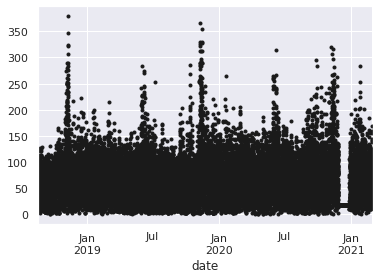

In [460]:
data['demand'].plot(style='k.')


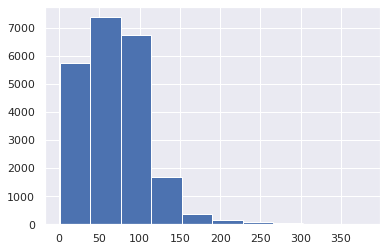

In [461]:
data['demand'].hist()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b446757d0>,
      dtype=object)

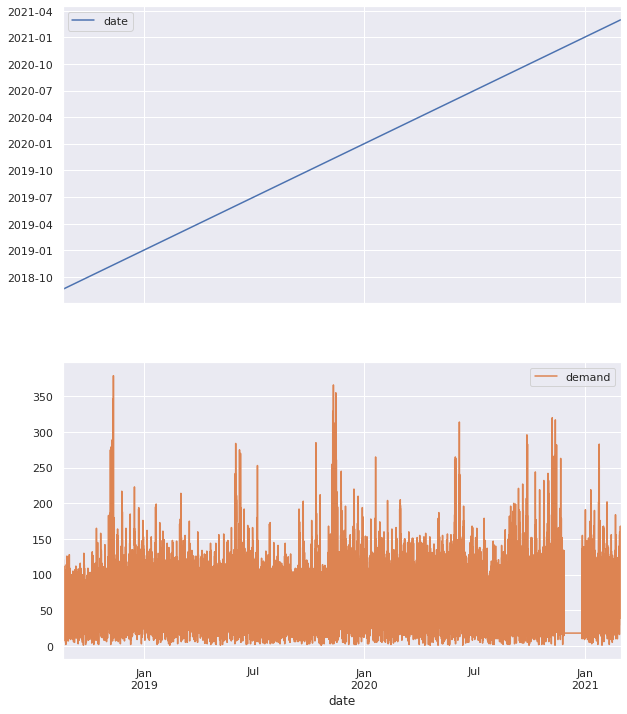

In [462]:
data.plot(subplots=True, figsize=(10, 12))


we can see Structural breaks between 2010-10 and 2021-01

##### handling outliers

In [463]:
print('Value at 95th percentile:', (np.percentile(data['demand'], 95)))
print('Value at 97th percentile:', (np.percentile(data['demand'], 97)))
print('Value at 99th percentile:', (np.percentile(data['demand'], 99)))

Value at 95th percentile: 135.0
Value at 97th percentile: 153.0
Value at 99th percentile: 200.86000000000058


In [464]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
demand,22215.0,68.96822,41.276257,1.0,37.0,66.0,94.0,379.0


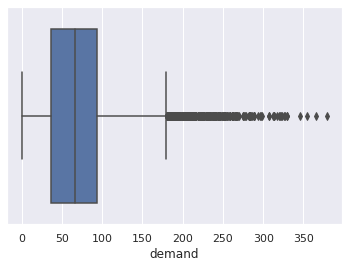

In [465]:
sns.boxplot(data['demand'])

In [466]:
IQR = (np.percentile(data['demand'], 75)) - (np.percentile(data['demand'], 25))
whisker_val = (np.percentile(data['demand'], 75)) + (1.5*(IQR))
whisker_val

179.5

In [467]:
# number of values greater than whisker value
data.loc[data['demand']>whisker_val].shape

(359, 2)

In [468]:
data.loc[data['demand']>whisker_val]

,date,demand
date,,
2018-11-02 14:00:00,2018-11-02 14:00:00,183
2018-11-04 17:00:00,2018-11-04 17:00:00,182
2018-11-04 19:00:00,2018-11-04 19:00:00,186
2018-11-05 13:00:00,2018-11-05 13:00:00,195
2018-11-05 14:00:00,2018-11-05 14:00:00,232
...,...,...
2021-01-24 15:00:00,2021-01-24 15:00:00,253
2021-01-24 16:00:00,2021-01-24 16:00:00,225
2021-01-24 19:00:00,2021-01-24 19:00:00,183


In [469]:
data_original = data['demand']
data['demand'] = data['demand'].apply(lambda x: np.nan if x > whisker_val else x)

In [470]:
data['demand'].isnull().sum()

359

In [471]:
# removing outliers using ffill
data['demand'] = data['demand'].fillna(method ='ffill')

In [472]:
data['demand'].isnull().sum()

0

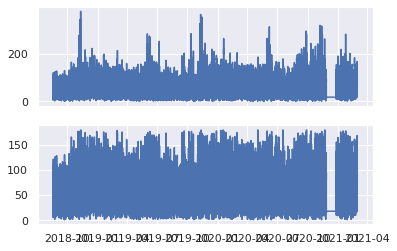

In [473]:
fig, axs = plt.subplots(2, 1,  sharex=True)

axs[0].plot(data_original,) 
axs[1].plot(data['demand'])
  
plt.show() 

#### 4.2 Feature extraction

In [474]:
data_feat = pd.DataFrame({"year": data['date'].dt.year,
                          "quarter": data['date'].dt.quarter,
                          "month": data['date'].dt.month,
                          "week": data['date'].dt.week,
                          "day": data['date'].dt.day,
                          "hour": data['date'].dt.hour,
                          "dayofyear": data['date'].dt.dayofyear,
                          "weekday": data['date'].dt.dayofweek
                         })
data_feat.head(20)

,year,quarter,month,week,day,hour,dayofyear,weekday
date,,,,,,,,
2018-08-18 09:00:00,2018,3,8,33,18,9,230,5
2018-08-18 10:00:00,2018,3,8,33,18,10,230,5
2018-08-18 11:00:00,2018,3,8,33,18,11,230,5
2018-08-18 12:00:00,2018,3,8,33,18,12,230,5
2018-08-18 13:00:00,2018,3,8,33,18,13,230,5
2018-08-18 14:00:00,2018,3,8,33,18,14,230,5
2018-08-18 15:00:00,2018,3,8,33,18,15,230,5
2018-08-18 16:00:00,2018,3,8,33,18,16,230,5
2018-08-18 17:00:00,2018,3,8,33,18,17,230,5


In [475]:
complete_data = pd.concat([data_feat, data['demand']], axis=1)

complete_data.head()

,year,quarter,month,week,day,hour,dayofyear,weekday,demand
date,,,,,,,,,
2018-08-18 09:00:00,2018,3,8,33,18,9,230,5,91.0
2018-08-18 10:00:00,2018,3,8,33,18,10,230,5,21.0
2018-08-18 11:00:00,2018,3,8,33,18,11,230,5,21.0
2018-08-18 12:00:00,2018,3,8,33,18,12,230,5,21.0
2018-08-18 13:00:00,2018,3,8,33,18,13,230,5,23.0


Exploration

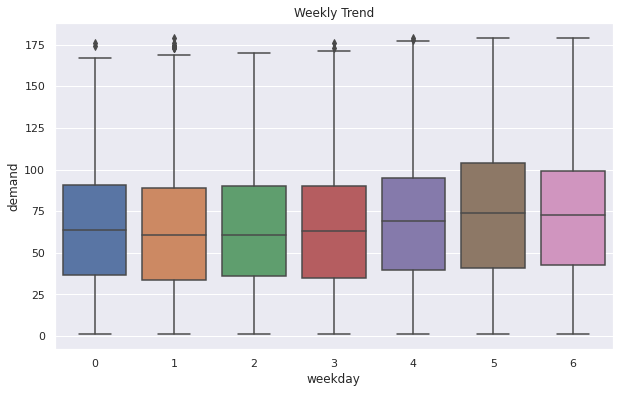

In [476]:
# boxplot for week's demand
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday'], y=complete_data['demand'], )
plt.title('Weekly Trend')
plt.show()

Weekend have small effect on the demand

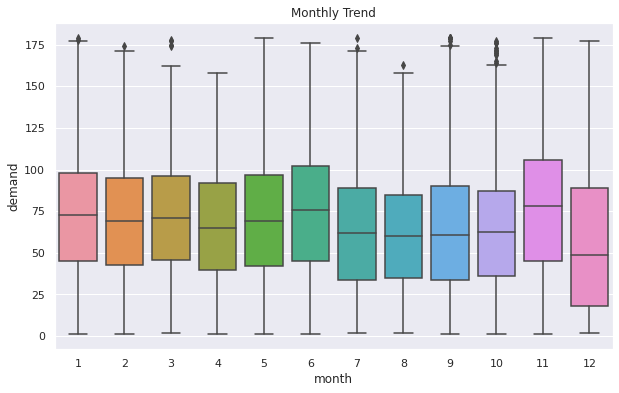

In [477]:
# boxplot for month's demand
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['demand'], )
plt.title('Monthly Trend')
plt.show()

Demand is higher for june, November and reduced on december.


In [478]:
# Let's check the average for each quarter

In [479]:
quarter_average = pd.DataFrame(complete_data.groupby('quarter')['demand'].mean())
quarter_average

,demand
quarter,
1,71.397569
2,70.813187
3,62.269632
4,66.440217


- 3rd and 4th Quarter had comparatively low demand than other quarters

 Let's check the average demand for each year.

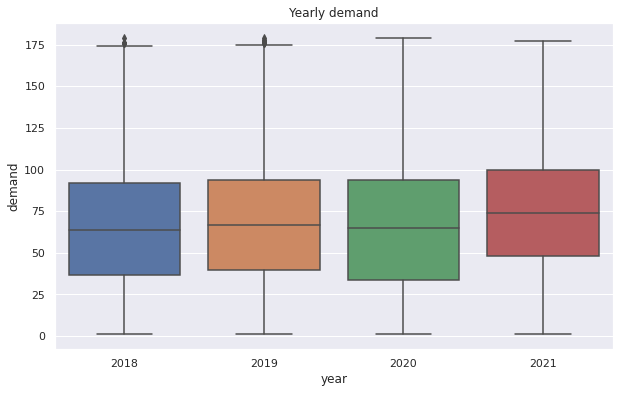

In [480]:
# boxplot for yearly demand
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['year'], y=complete_data['demand'], )
plt.title('Yearly demand')
plt.show()

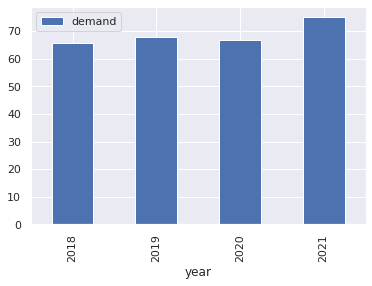

In [481]:
yearly_average = pd.DataFrame(complete_data.groupby('year')['demand'].mean())
yearly_average.plot(kind='bar')

 - Demand is increasing over the years
 - 2020 saw a dip and 2021 saw growth


## Summary:
- Weekend have slight effect on the demand

-Demand is higher for june, November and reduced on december.

- 3rd and 4th Quarter had comparatively low demand than other quarters

- demand is increasing over the years 

### Step 5: Building Model

Building ML Models

In [482]:
complete_data.head()

,year,quarter,month,week,day,hour,dayofyear,weekday,demand
date,,,,,,,,,
2018-08-18 09:00:00,2018,3,8,33,18,9,230,5,91.0
2018-08-18 10:00:00,2018,3,8,33,18,10,230,5,21.0
2018-08-18 11:00:00,2018,3,8,33,18,11,230,5,21.0
2018-08-18 12:00:00,2018,3,8,33,18,12,230,5,21.0
2018-08-18 13:00:00,2018,3,8,33,18,13,230,5,23.0


In [483]:
train_data = complete_data[:12773] # 70% of data
valid_data = complete_data[12773:] # 30% of data
valid_data.head()

,year,quarter,month,week,day,hour,dayofyear,weekday,demand
date,,,,,,,,,
2020-02-01 14:00:00,2020,1,2,5,1,14,32,5,137.0
2020-02-01 15:00:00,2020,1,2,5,1,15,32,5,65.0
2020-02-01 16:00:00,2020,1,2,5,1,16,32,5,89.0
2020-02-01 17:00:00,2020,1,2,5,1,17,32,5,138.0
2020-02-01 18:00:00,2020,1,2,5,1,18,32,5,58.0


### Linear Regression Model

In [484]:
from sklearn.linear_model import LinearRegression

In [485]:
# separating features and target variable
x_train = train_data.drop(['demand'], axis=1)
y_train = train_data['demand']

x_valid = valid_data.drop(['demand'], axis=1)
y_valid = valid_data['demand']

In [486]:
#training the model
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
preds = model.predict(x_valid)


In [487]:

# results
score = sqrt(mean_squared_error(y_valid, preds))

print('RMSE for Linear Regression is', score)

RMSE for Linear Regression is 38.56134000605302


In [488]:
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,year,3.558943
1,quarter,-5.890016
2,month,-86.304079
3,week,-0.078377
4,day,-3.001046
5,hour,0.983345
6,dayofyear,2.917896
7,weekday,2.295868


<BarContainer object of 8 artists>

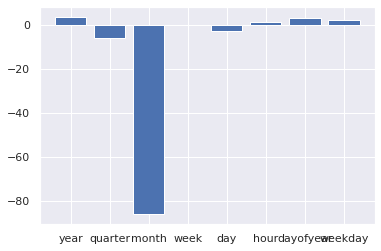

In [489]:
plt.bar(feature_coeff['Feature'], feature_coeff['coeff'])

---  # Regularization for Linear Regression

In [490]:
from sklearn.linear_model import Ridge

In [491]:
# target encoding
# month level encoding
monthly_average = pd.DataFrame(train_data.groupby('month')['demand'].mean())
train_data['monthly_average'] = train_data['month'].map(monthly_average.demand)
valid_data['monthly_average'] = valid_data['month'].map(monthly_average.demand)


# week target encoding
week_average = pd.DataFrame(train_data.groupby('weekday')['demand'].mean())
train_data['week_average'] = train_data['weekday'].map(week_average.demand)
valid_data['week_average'] = valid_data['weekday'].map(week_average.demand)

# daily target encoding
day_average = pd.DataFrame(train_data.groupby('day')['demand'].mean())
train_data['day_average'] = train_data['day'].map(day_average.demand)
valid_data['day_average'] = valid_data['day'].map(day_average.demand)


In [492]:
# separating features and target variable
x_train = train_data.drop(['demand'], axis=1)
y_train = train_data['demand']

x_valid = valid_data.drop(['demand'], axis=1)
y_valid = valid_data['demand']

In [493]:
for alpha in [0.01, 0.05, 0.1, 0.5, 1, 5]:
    print('----- ----- ----- ----- -----')
    print('At alpha value:', alpha)

    #training the model
    model = Ridge(alpha = alpha, normalize=True)
    model.fit(x_train, y_train)

    # predictions 
    preds = model.predict(x_valid)
    score = sqrt(mean_squared_error(y_valid, preds))


    # results
    print('Linear Regression error is', score)

----- ----- ----- ----- -----
At alpha value: 0.01
Linear Regression error is 38.240385433421416
----- ----- ----- ----- -----
At alpha value: 0.05
Linear Regression error is 38.210212526966714
----- ----- ----- ----- -----
At alpha value: 0.1
Linear Regression error is 38.175965218838634
----- ----- ----- ----- -----
At alpha value: 0.5
Linear Regression error is 38.063047162278785
----- ----- ----- ----- -----
At alpha value: 1
Linear Regression error is 38.0787142729245
----- ----- ----- ----- -----
At alpha value: 5
Linear Regression error is 38.40365257064846


In [494]:
#training the model
model = Ridge(alpha = 0.5, normalize=True)
model.fit(x_train, y_train)

# predictions 
preds = model.predict(x_valid)
score = sqrt(mean_squared_error(y_valid, preds))

# results
print('Linear Regression error is', score)

Linear Regression error is 38.063047162278785


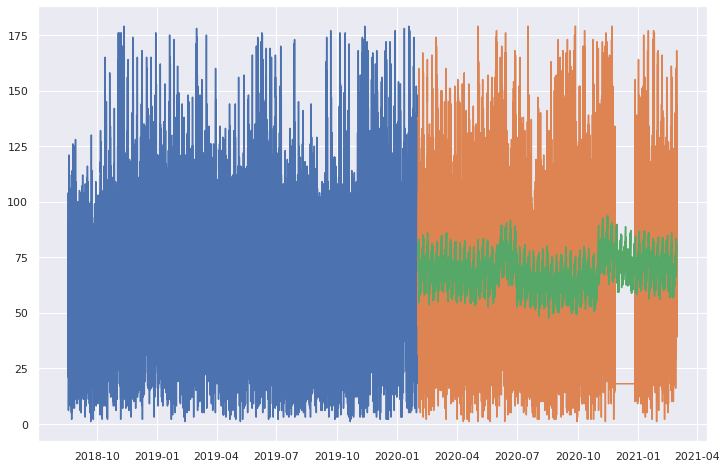

In [495]:
plt.figure(figsize=(12,8))
plt.plot(train_data.index, train_data['demand'], label = 'train')
plt.plot(valid_data.index, valid_data['demand'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [496]:
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,year,1.005387
1,quarter,-0.034303
2,month,0.031279
3,week,0.003378
4,day,-0.009180
5,hour,0.655444
6,dayofyear,0.001021
7,weekday,0.740584
8,monthly_average,0.651951
9,week_average,0.500620


<BarContainer object of 11 artists>

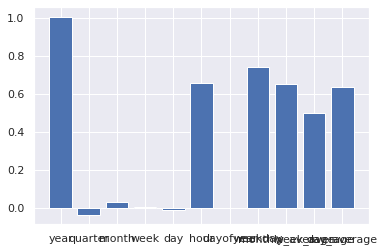

In [497]:
plt.bar(feature_coeff['Feature'], feature_coeff['coeff'])

In [498]:
x_train.columns

Index(['year', 'quarter', 'month', 'week', 'day', 'hour', 'dayofyear',
       'weekday', 'monthly_average', 'week_average', 'day_average'],
      dtype='object')

In [499]:
# separating features and target variable
x_train = train_data.drop(['day', 'quarter','month', 'week','dayofyear', 'demand'], axis=1)
y_train = train_data['demand']

x_valid = valid_data.drop(['day', 'quarter','month', 'week','dayofyear', 'demand'], axis=1)
y_valid = valid_data['demand']

In [500]:
#training the model
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
preds = model.predict(x_valid)


In [501]:

# results
score = sqrt(mean_squared_error(y_valid, preds))

print('RMSE for Linear Regression is', score)

RMSE for Linear Regression is 38.19969199809653


In [502]:
featcols= list(x_train.columns)

#### Random Forest

In [503]:
from sklearn.ensemble import RandomForestRegressor

In [504]:
#training the model
model = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split = 25, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

score = sqrt(mean_squared_error(y_valid, preds))
   
# results
print('Average Error is',score)

Average Error is 35.799551084374684


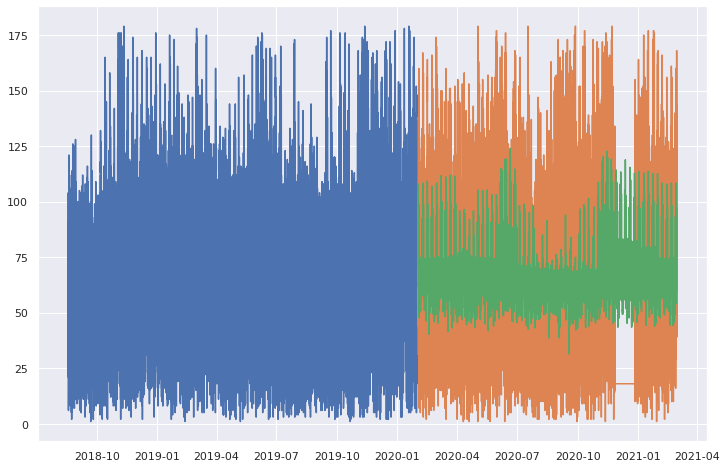

In [505]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['demand'], label = 'train')
plt.plot(valid_data.index, valid_data['demand'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

Hyperparameter Tuning

In [506]:
from itertools import product
from tqdm import tqdm_notebook

In [507]:
model = RandomForestRegressor(random_state=0)

In [508]:
# setting initial values and some bounds for them
n_estimator = [70, 100, 130, 150]
max_depth =  [5, 6, 7, 8, 9]
min_samples_split = [20, 30, 50]


# creating list with all the possible combinations of parameters
parameters = product(n_estimator, max_depth, min_samples_split)
parameters_list = list(parameters)
len(parameters_list)

60

In [509]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        
        #training the model
        model = RandomForestRegressor(n_estimators=param[0], max_depth=param[1], min_samples_split = param[2], random_state=0)
        model.fit(x_train, y_train)

        # predictions 
        preds = model.predict(x_valid)

        # predictions and evaluation
        score = sqrt(mean_squared_error(y_valid, preds))
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'score']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='score', ascending=True).reset_index(drop=True)
    
    return result_table

In [510]:
grid_search(parameters_list)

  0%|          | 0/60 [00:00<?, ?it/s]

,parameters,score
0,"(150, 6, 20)",35.780484
1,"(150, 6, 30)",35.781873
2,"(130, 6, 20)",35.783961
3,"(150, 6, 50)",35.784853
4,"(130, 6, 30)",35.785170
5,"(130, 6, 50)",35.788830
6,"(100, 6, 20)",35.790634
7,"(100, 6, 30)",35.792194
8,"(100, 6, 50)",35.795616
9,"(100, 7, 50)",35.797931


In [511]:
#training the model
model = RandomForestRegressor(n_estimators=150, max_depth=6, min_samples_split = 20, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

score = sqrt(mean_squared_error(y_valid, preds))
   
# results
print('Average Error is',score)

Average Error is 35.78048449382768


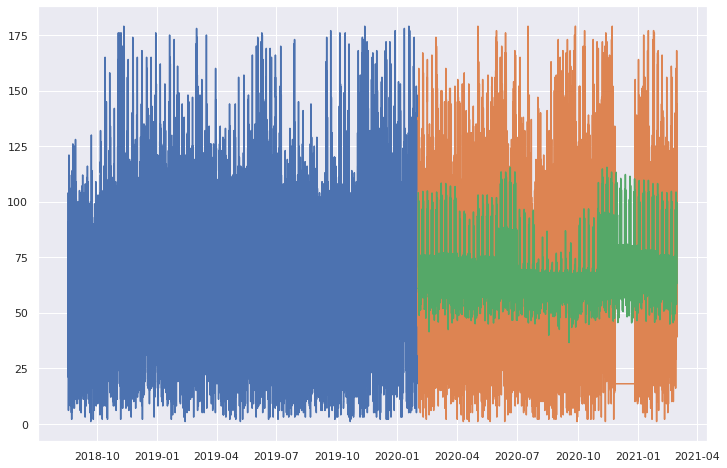

In [512]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['demand'], label = 'train')
plt.plot(valid_data.index, valid_data['demand'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [513]:
list(x_train.columns)

['year', 'hour', 'weekday', 'monthly_average', 'week_average', 'day_average']

### Forecast for next 1 year

In [514]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [515]:
test_set= test.copy()

In [516]:
# Typecasting into date and hour into datetime format and join together into date field.

test_set['date']= pd.to_datetime(test_set['date'],format="%Y/%m/%d") + pd.to_timedelta(test_set.hour, unit='h')
test_set.head()

,date,hour
0,2021-03-01 00:00:00,0
1,2021-03-01 01:00:00,1
2,2021-03-01 02:00:00,2
3,2021-03-01 03:00:00,3
4,2021-03-01 05:00:00,5


In [517]:
list(x_train.columns)

['year', 'hour', 'weekday', 'monthly_average', 'week_average', 'day_average']

In [518]:
test_feat = pd.DataFrame({"date":test_set['date'],
                        "year": test_set['date'].dt.year,
                          "month": test_set['date'].dt.month,
                          "day": test_set['date'].dt.day,
                          "hour": test_set['date'].dt.hour,
                          "weekday": test_set['date'].dt.dayofweek,
                          "weekday_name":test_set['date'].dt.strftime("%A"),
                          "dayofyear": test_set['date'].dt.dayofyear,
                          "week": test_set['date'].dt.week,
                          "quarter": test_set['date'].dt.quarter,
                         })
test_feat.head()


,date,year,month,day,hour,weekday,weekday_name,dayofyear,week,quarter
0,2021-03-01 00:00:00,2021,3,1,0,0,Monday,60,9,1
1,2021-03-01 01:00:00,2021,3,1,1,0,Monday,60,9,1
2,2021-03-01 02:00:00,2021,3,1,2,0,Monday,60,9,1
3,2021-03-01 03:00:00,2021,3,1,3,0,Monday,60,9,1
4,2021-03-01 05:00:00,2021,3,1,5,0,Monday,60,9,1


In [519]:
# target encoding
# month level encoding
monthly_average = pd.DataFrame(complete_data.groupby('month')['demand'].mean())
complete_data['monthly_average'] = complete_data['month'].map(monthly_average.demand)
test_feat['monthly_average'] = test_feat['month'].map(monthly_average.demand)


# week target encoding
week_average = pd.DataFrame(complete_data.groupby('weekday')['demand'].mean())
complete_data['week_average'] = complete_data['weekday'].map(week_average.demand)
test_feat['week_average'] = test_feat['weekday'].map(week_average.demand)

# daily target encoding
daily_average = pd.DataFrame(complete_data.groupby('day')['demand'].mean())
complete_data['day_average'] = complete_data['day'].map(daily_average.demand)
test_feat['day_average'] = test_feat['day'].map(daily_average.demand)


In [520]:
test_feat.isnull().sum()

date               0
year               0
month              0
day                0
hour               0
weekday            0
weekday_name       0
dayofyear          0
week               0
quarter            0
monthly_average    0
week_average       0
day_average        0
dtype: int64

In [521]:
test_set.shape, test_feat.shape

((7650, 2), (7650, 13))

In [522]:
x_train = complete_data.drop(['quarter','month','week', 'day','dayofyear','demand'], axis=1)
y_train = complete_data['demand']

x_test = test_feat.drop(['month','day','weekday_name', 'dayofyear', 'week', 'quarter' ], axis=1)
x_valid = test_feat.drop(['date','month','day','weekday_name', 'dayofyear', 'week', 'quarter' ], axis=1)

Preparing Random Forest Model

In [523]:
#training the model
model = RandomForestRegressor(n_estimators=150, max_depth=6, min_samples_split = 20, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)
   


In [524]:
test_feat['demand'] = preds

In [525]:
test_feat.describe()

,year,month,day,hour,weekday,dayofyear,week,quarter,monthly_average,week_average,day_average,demand
count,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000
mean,2021.239739,6.098431,15.617124,12.539085,3.027843,169.814902,24.588627,2.337778,68.649664,67.645638,67.565268,70.231313
std,0.426952,3.552510,8.718484,6.620355,2.009231,108.716999,15.523675,1.179818,6.137098,5.171183,2.513460,18.096278
min,2021.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,56.706541,62.234848,62.368707,21.873687
25%,2021.000000,3.000000,8.000000,8.000000,1.000000,75.000000,11.000000,1.000000,63.744176,62.915720,65.297043,58.232532
50%,2021.000000,5.000000,16.000000,13.000000,3.000000,151.000000,22.000000,2.000000,70.098118,64.845328,67.884722,69.991228
75%,2021.000000,10.000000,23.000000,18.000000,5.000000,275.000000,40.000000,4.000000,72.712366,73.532268,68.956897,77.780379
max,2022.000000,12.000000,31.000000,23.000000,6.000000,365.000000,52.000000,4.000000,79.284259,76.311970,73.689815,119.367696


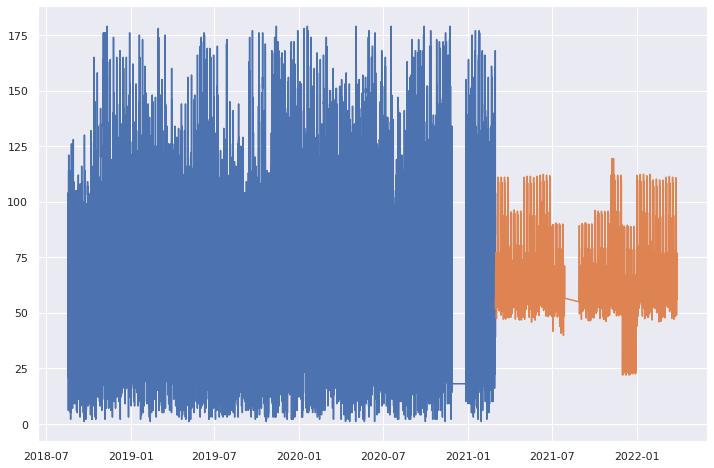

In [526]:
plt.figure(figsize = (12,8))

plt.plot(complete_data.index, complete_data['demand'], label = 'train')
plt.plot(test_feat.date, test_feat['demand'], label = 'preds')
plt.show()

### Step 6 :Preparing submission file

In [527]:
#Predict on actual test dataset for final prediction
predicted_test = model.predict(x_valid)
predicted_test

array([56.55229457, 55.62930968, 54.45456854, ..., 61.89107788,
       56.51696132, 55.98448495])

In [528]:
my_submission = pd.DataFrame({'date': x_test['date'], 'hour': x_test['hour'], 'demand': predicted_test})

In [529]:
my_submission['date'] = pd.to_datetime(my_submission['date']).dt.date
my_submission

,date,hour,demand
0,2021-03-01,0,56.552295
1,2021-03-01,1,55.629310
2,2021-03-01,2,54.454569
3,2021-03-01,3,52.533248
4,2021-03-01,5,52.010548
...,...,...,...
7645,2022-03-28,19,76.962072
7646,2022-03-28,20,70.672940
7647,2022-03-28,21,61.891078
7648,2022-03-28,22,56.516961


In [532]:
my_submission.to_csv(r'/content/drive/My Drive/AVJobathon/Aprill22/Dataset/JobathonSolutionRForest.csv', index=False)

--- Thank you. ---